## Методы оптимизации 
#### Корбут Даниил, 494 группа 

In [4]:
import random
import math
import numpy as np
import scipy.stats as sp
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import log
from scipy.optimize import linprog
%matplotlib inline

### Задание 1

В этом задании необходимо минимизировать функцию потерь специального вида: $Q(\omega) = \Sigma^m_{i=1} ln(1+exp(-y_i \cdot<x_i,\omega>))$

Давайте для начала сгенерируем 4 необходимых датасета: 
<ul>
<li> Множество, неразделимое в 2D </li>
<li> Множество, разделимое в 2D </li>
<li> Множество, неразделимое в 3D </li>
<li> Множество, разделимое в 3D </li>
</ul>

In [5]:
# dataset: [n, x, y]
m = 100 # число точек

# точки двух классов в 2D (неразделимые прямой)
dataset1 = [2, np.array([np.array((-1, np.random.uniform(0, 1),
            np.random.uniform(0, 1))) for i in range(m)]),
            np.random.randint(0, 2, m) * 2 - 1] 

# точки двух классов в 2D (разделимые прямой)
dataset2 = [2, np.array([np.array((-1, np.random.uniform(0, 1),
            np.random.uniform(0, 1))) for i in range(m)]),
            np.random.randint(0, 2, m)] 
for i in range(m):
    k = 0.2
    b = 0.25
    if k * dataset2[1][i][1] + b > dataset2[1][i][2]:
        dataset2[2][i] = 1
    else:
        dataset2[2][i] = -1

# точки двух классов в 3D (неразделимые плоскостью)
dataset3 = [3,np.array([np.array((-1, np.random.uniform(0, 1),
            np.random.uniform(0, 1),
            np.random.uniform(0, 1))) for i in range(m)]),
            np.random.randint(0, 2, m) * 2 - 1] 

# точки двух классов в 3D (разделимые плоскостью)
dataset4 = [3, np.array([np.array((-1, np.random.uniform(0, 1),
            np.random.uniform(0, 1),
            np.random.uniform(0, 1))) for i in range(m)]),
            np.random.randint(0, 2, m)] 
for i in range(m):
    k1 = 0.3
    k2 = 0.1
    b = 0.2
    if k1 * dataset4[1][i][1] + k2 * dataset4[1][i][1] + b > dataset4[1][i][2]:
        dataset4[2][i] = 1
    else:
        dataset4[2][i] = -1

Теперь реализуем градиентный спуск.
<br> k-я координата градиента от $Q(\omega)$ равна:

$$\sum_{i=1}^{n} \frac{-y_i x_i^k exp(-y_i \cdot<x_i,\omega>)}{1+exp(-y_i \cdot<x_i,\omega>)}$$

In [8]:
def q_gradient(dataset, omega):
    n, x, y = dataset
    e = [np.exp(-y[i] * sum(x[i] * omega)) for i in range(m)]
    return np.array([sum([-y[i]*x[i][k]*e[i]/(1+e[i]) for i in range(m)]) for k in range(n + 1)])

def q_value(dataset, omega):
    n, x, y = dataset
    e = [np.exp(-y[i] * sum(x[i] * omega)) for i in range(m)]
    return sum([np.log(1+e[i]) for i in range(m)])

def gradient_descent(dataset, start, eps=0.00001):
    lmbd, q, cnt = 1, 0.98, 0
    point = start
    while lmbd > eps:
        point = point - q_gradient(dataset, point) * lmbd
        lmbd *= q
        cnt += 1
    print(cnt)
    return point

In [36]:
start2 = np.array((np.random.uniform(0, 1),
                  np.random.uniform(0, 1),
                  np.random.uniform(0, 1)))
minimum1 = gradient_descent(dataset1, start)
print(start2, minimum1)

570
[ 0.37847685  0.50153318  0.24946354] [-0.52820894 -1.47965747  0.31169947]


Теперь посмотрим на работу градиентного спуска на наборах точек в 2D

In [37]:
def print_graph2(dataset, start2, minimum):
        plt.figure(figsize=(21, 7))
        plt.subplot(131)
        plt.plot([dataset[1][i][1] for i in range(m) if dataset[2][i] == 1 ], 
                 [dataset[1][i][2] for i in range(m) if dataset[2][i] == 1 ], 'or')
        plt.plot([dataset[1][i][1] for i in range(m) if dataset[2][i] == -1 ], 
                 [dataset[1][i][2] for i in range(m) if dataset[2][i] == -1 ], 'ob')
        plt.xlabel("$y$")
        plt.ylabel("$z$")
        plt.title("$x = -1$, original dataset")
        
        plt.subplot(132)
        plt.plot([dataset[1][i][1] for i in range(m) if sum(dataset[1][i] * start) > 0], 
                 [dataset[1][i][2] for i in range(m) if sum(dataset[1][i] * start) > 0], 'or')
        plt.plot([dataset[1][i][1] for i in range(m) if sum(dataset[1][i] * start) <= 0], 
                 [dataset[1][i][2] for i in range(m) if sum(dataset[1][i] * start) <= 0], 'ob')
        plt.xlabel("$y$")
        plt.ylabel("$z$")
        plt.title("$x = -1$, start hyperplane")
        
        plt.subplot(133)
        plt.plot([dataset[1][i][1] for i in range(m) if sum(dataset[1][i] * minimum) > 0], 
                 [dataset[1][i][2] for i in range(m) if sum(dataset[1][i] * minimum) > 0], 'or')
        plt.plot([dataset[1][i][1] for i in range(m) if sum(dataset[1][i] * minimum) <= 0], 
                 [dataset[1][i][2] for i in range(m) if sum(dataset[1][i] * minimum) <= 0], 'ob')
        plt.xlabel("$y$")
        plt.ylabel("$z$")
        plt.title("$x = -1$, minimum hyperplane")
        plt.show()

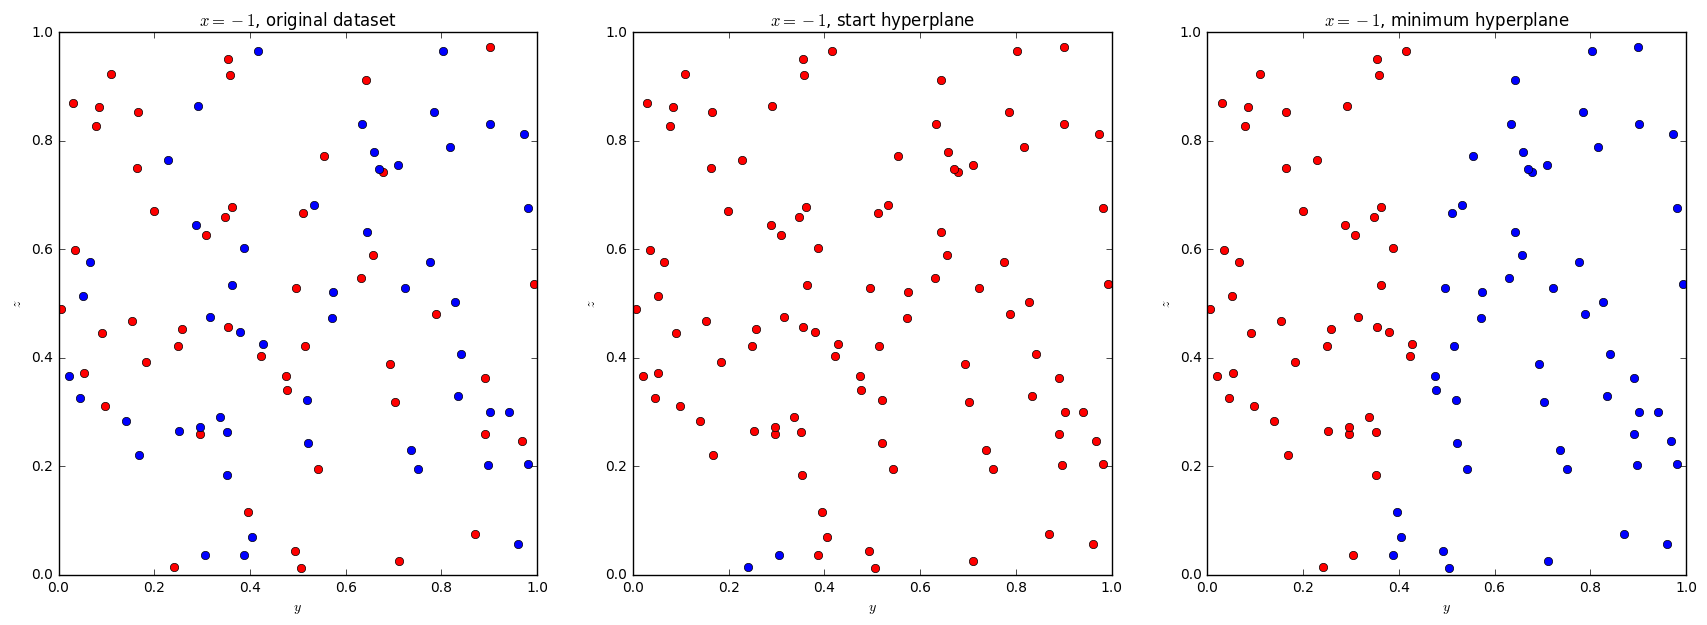

In [38]:
print_graph2(dataset1, start, minimum1)

570


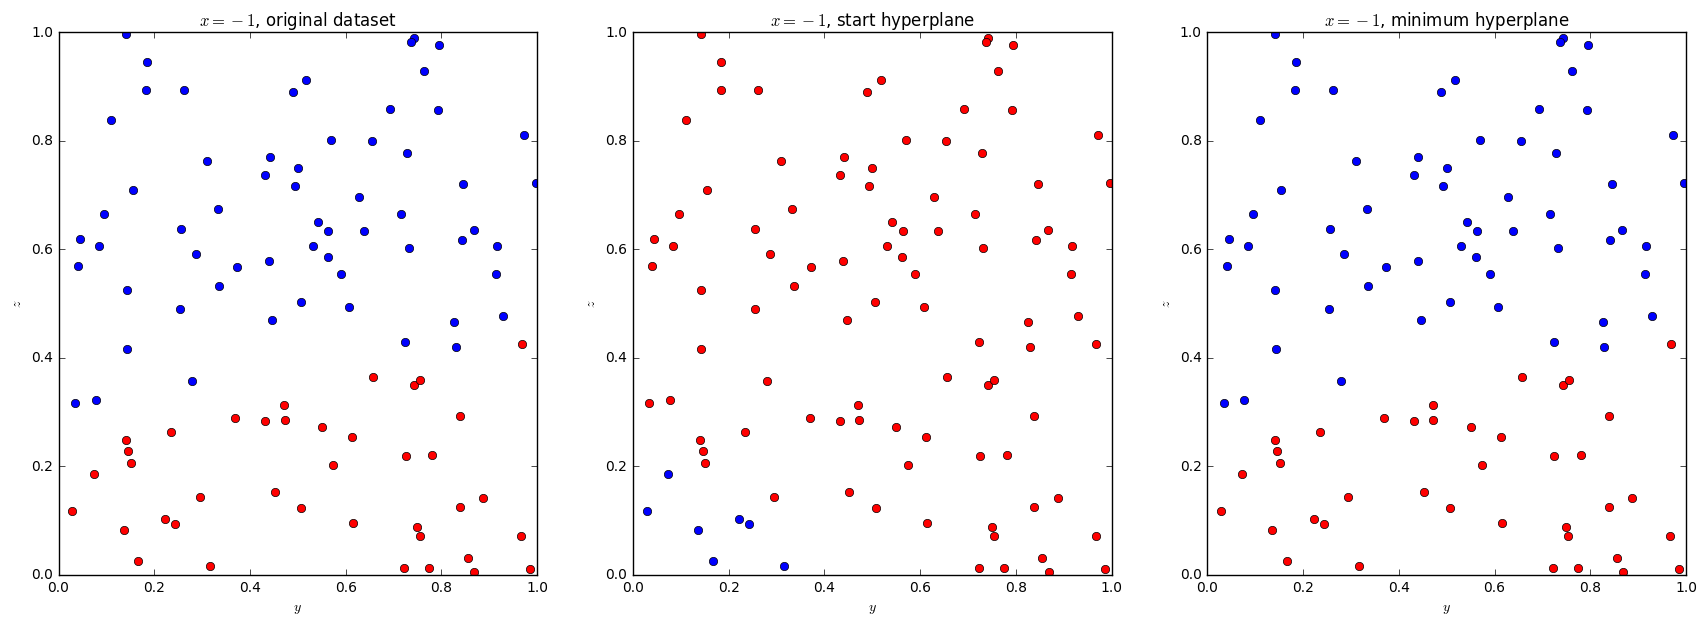

In [39]:
print_graph2(dataset2, start, gradient_descent(dataset2, dataset2[1][0]))

Видно, что алгоритм отлично справился с задачей разделения классов во 2-м датасете, в 1-м же провели разделяющую прямую так, чтобы функция потерь была минимальна.

Теперь будем смотреть на работу градиентного спуска для точек в 3D

In [40]:
def print_graph3(dataset, start, minimum):
    plt.figure(figsize=(21, 7))
    ax = plt.subplot(131, projection='3d')
    ax.scatter(xs=[dataset[1][i][1] for i in range(m) if dataset[2][i] == 1], 
               ys=[dataset[1][i][2] for i in range(m) if dataset[2][i] == 1], 
               zs=[dataset[1][i][3] for i in range(m) if dataset[2][i] == 1], c='r', marker='o')
    ax.scatter(xs=[dataset[1][i][1] for i in range(m) if dataset[2][i] == -1], 
               ys=[dataset[1][i][2] for i in range(m) if dataset[2][i] == -1], 
               zs=[dataset[1][i][3] for i in range(m) if dataset[2][i] == -1], c='b', marker='o')
    plt.title("$x = -1$, original dataset 3")

    ax = plt.subplot(132, projection='3d')
    ax.scatter(xs=[dataset[1][i][1] for i in range(m) if sum(dataset[1][i] * start) > 0], 
               ys=[dataset[1][i][2] for i in range(m) if sum(dataset[1][i] * start) > 0], 
               zs=[dataset[1][i][3] for i in range(m) if sum(dataset[1][i] * start) > 0], c='r', marker='o')
    ax.scatter(xs=[dataset[1][i][1] for i in range(m) if sum(dataset[1][i] * start) <= 0], 
               ys=[dataset[1][i][2] for i in range(m) if sum(dataset[1][i] * start) <= 0], 
               zs=[dataset[1][i][3] for i in range(m) if sum(dataset[1][i] * start) <= 0], c='b', marker='o')
    plt.title("$x = -1$, start hyperplane")
    
    ax = plt.subplot(133, projection='3d')
    ax.scatter(xs=[dataset[1][i][1] for i in range(m) if sum(dataset[1][i] * minimum) > 0], 
               ys=[dataset[1][i][2] for i in range(m) if sum(dataset[1][i] * minimum) > 0], 
               zs=[dataset[1][i][3] for i in range(m) if sum(dataset[1][i] * minimum) > 0], c='r', marker='o')
    ax.scatter(xs=[dataset[1][i][1] for i in range(m) if sum(dataset[1][i] * minimum) <= 0], 
               ys=[dataset[1][i][2] for i in range(m) if sum(dataset[1][i] * minimum) <= 0], 
               zs=[dataset[1][i][3] for i in range(m) if sum(dataset[1][i] * minimum) <= 0], c='b', marker='o')
    plt.title("$x = -1$, minimum hyperplane")
    
    plt.show()

In [41]:
start3 = np.array((np.random.uniform(0, 1),
                   np.random.uniform(0, 1),
                   np.random.uniform(0, 1),
                   np.random.uniform(0, 1)))
minimum3 = gradient_descent(dataset3, start3)
print(start3, minimum3)

570
[ 0.54785897  0.55534937  0.23844613  0.77012938] [-0.31002796  0.90262214 -0.42812807 -0.98568261]


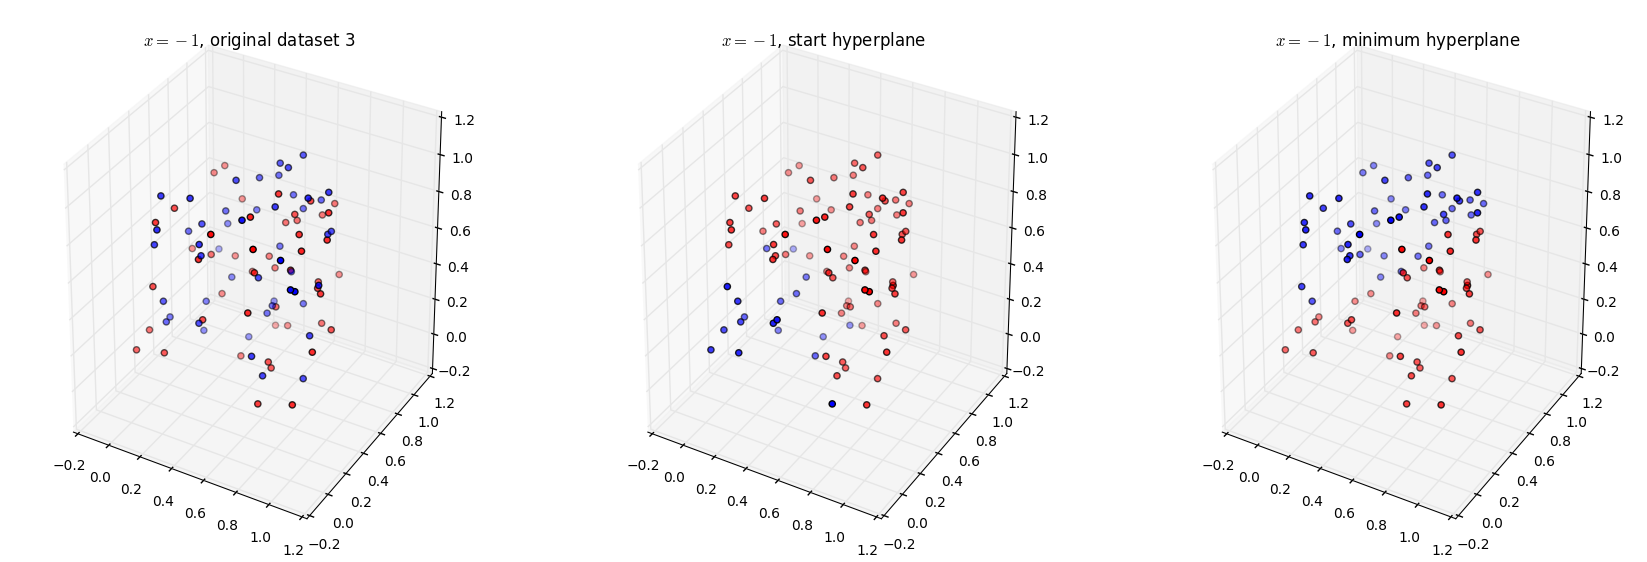

In [42]:
print_graph3(dataset3, start3, minimum3)

570


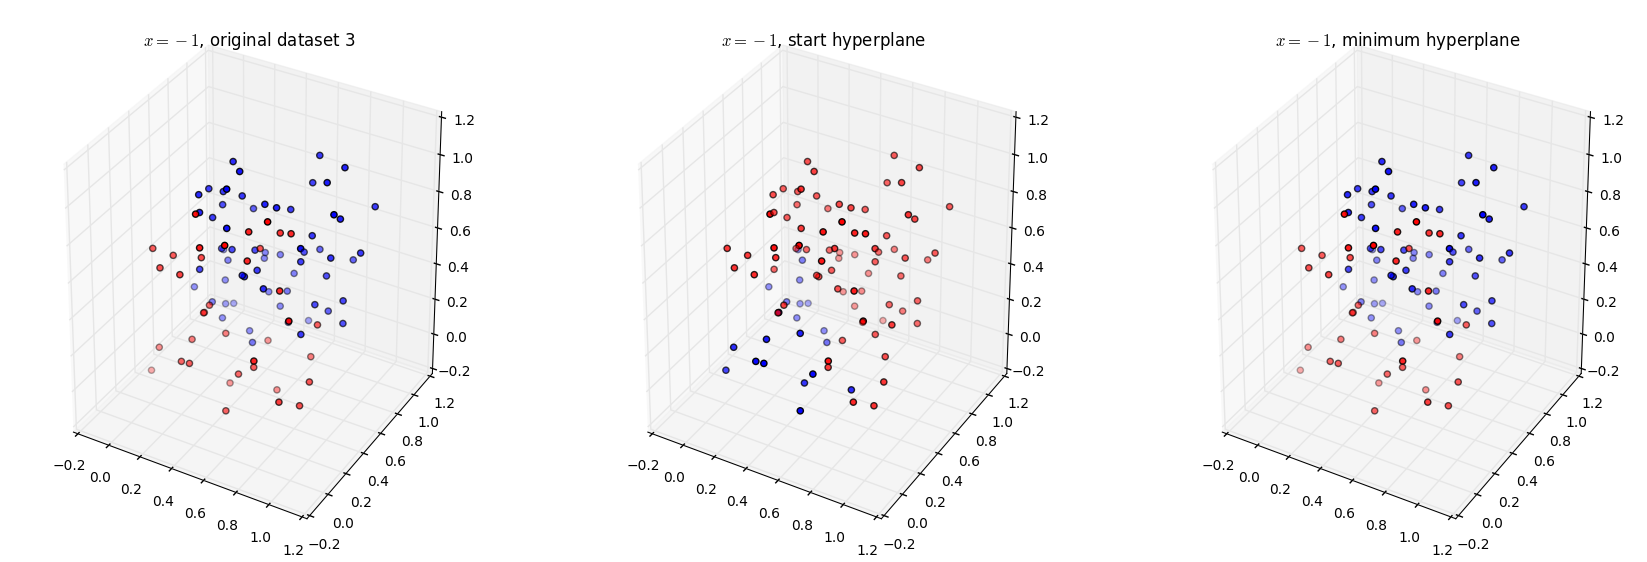

In [43]:
print_graph3(dataset4, start3, gradient_descent(dataset4, start3))

Мы видим, что на 2 и 4 датасетах логистическая регрессия работает прекрасно.
Значит, и градиентный спуск работает правильно, раз находит минимум. Мы видим, что он работает 570 шагов, уменьшая $\lambda$ с 1 до $\varepsilon=0.00001$. Действительно, число операций зависит линейно от $log(\varepsilon)$.

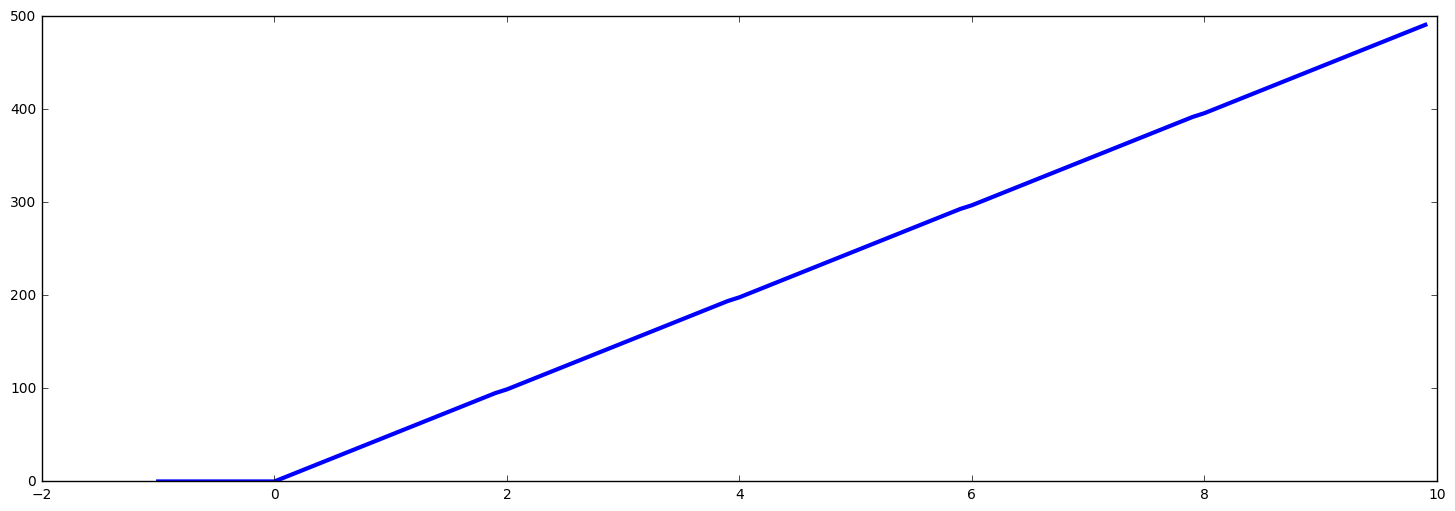

In [49]:
def gradient_descent_operations(eps):
    lmbd, q, cnt = 1, 0.98, 0
    while lmbd > eps:
        lmbd *= q
        cnt += 1
    return cnt

plt.figure(figsize=(18,6))
x = np.arange(-1, 10, 0.1)
plt.plot(x, [gradient_descent_operations(1/np.exp(t)) for t in x], lw=3.0)
plt.show()

### Задание 2

#### Пункт а)

Почему решение если сходится, то сходится к решению задачи ЛП:
<br>При устремлении μ→0 находим решение:
<br>Ax+xs=b
<br>ATy−ys=c

А это по теореме о двойственной задаче и будет решением задачи ЛП.

### Задание 3

In [50]:
M = 200
a = np.array([6, 4, 3])
sigma = 0.1
time = np.linspace(0, 10 - (10/M), M)

def func(a):
    return a[0] * np.sin(time) + a[1] * time + a[2]

In [52]:
def generate(a, sigma): 
    y_theory = a[0] * np.sin(time) + a[1] * time + a[2]
    y_real = y_theory \
        + np.array(ssp.norm.rvs(loc=0, scale=sigma, size=len(time)))
    return y_theory, y_real
y_theory, y_real = generate(a, sigma)

####  Метод наименьших квадратов ####

Будем находить приближенные значения методом наименьших квадратов.
<br>Для этого нам надо минимизировать $\left\lVert Aa - b \right\lVert_2$, где $a = [a_1, a_2, a_3]$, а $b = [y_{1}^{real}, \dots, y_{m}^{real}]$.

Надо взять $$A = \left( \begin{matrix} sin t_1 & t_1 & 1 \\ sin t_2 & t_2 & 1 \\ \dots \\ sin t_m & t_m & 1\end{matrix}\right) $$

И по методу наименьших квадратов: $a = \left(A^T A\right)^{-1} A^T \vec{b}$

In [54]:
def min_squares(y_real):
    A = np.matrix([[np.sin(elem), elem, 1] for elem in time])
    answer = (A.T * A).I * A.T * np.matrix(y_real).T
    return np.array(answer).reshape(3)

#### Метод наименьшей суммы модулей ####
Нам надо минимизировать: $$\sum_{k=1}^m{\left| a_1 sin t_k + a_2 t_k + a_3 - y^{real}_k \right|}$$
Заметим, что это эквивалентно решению следущей задачи ЛП:
$$ \sum_{k = 1}^{m}{z_i} \rightarrow min$$
$$ A \vec{a} - \vec{z} \le \vec{b} $$
$$ -A \vec{a} - \vec{z} \le -\vec{b} $$
Где $a_1, a_2, a_3, \vec{z}$ - переменные

In [62]:
def min_sum(y_real):
    func = np.array([0, 0, 0] + [1 for i in range(M)])
    A = np.matrix([[np.sin(elem), elem, 1] for elem in time])
    E = np.identity(M) * (-1)
    coeff = np.concatenate(
        (np.concatenate((A, A * (-1)), axis=0), 
        np.concatenate((E, E), axis=0)),
        axis=1)
    b = np.matrix(np.concatenate((y_real, y_real * (-1))))
    res = linprog(func, A_ub=coeff, b_ub=b,
                      bounds=None, 
                      options=dict(bland=True, tol=1e-8, maxiter=10 ** 6))
    return np.array(res.x[:3])

#### Метод наименьшего абсолютного значения ####
Нам надо минимизировать: $$\max\limits_{i \in [1, \dots, m]}{\left| a_1 sin t_k + a_2 t_k + a_3 - y^{real}_k \right|}$$
Заметим, что это эквивалентно решению следущей задачи ЛП:
$$ z \rightarrow min$$
$$ A \vec{a} - z \le \vec{b} $$
$$ -A \vec{a} - z \le -\vec{b} $$
Где $a_1, a_2, a_3, z$ - переменные

In [63]:
def min_max(y_real):
    func = np.array([0, 0, 0, 1])
    A = np.matrix([[np.sin(elem), elem, 1] for elem in time])
    E = np.ones((2 * M, 1)) * (-1)
    coeff = np.concatenate(
        (np.concatenate((A, A * (-1)), axis=0), E), axis=1)
    b = np.matrix(np.concatenate((y_real, y_real * (-1))))
    res = linprog(func, A_ub=coeff, b_ub=b,
                      bounds=None, 
                      options=dict(bland=True, tol=1e-8, maxiter=10 ** 6))
    return np.array(res.x[:3])

In [64]:
f_min_squares = func(min_squares(y_real))
f_min_sum = func(min_sum(y_real))
f_min_max = func(min_max(y_real))
f = func(a)

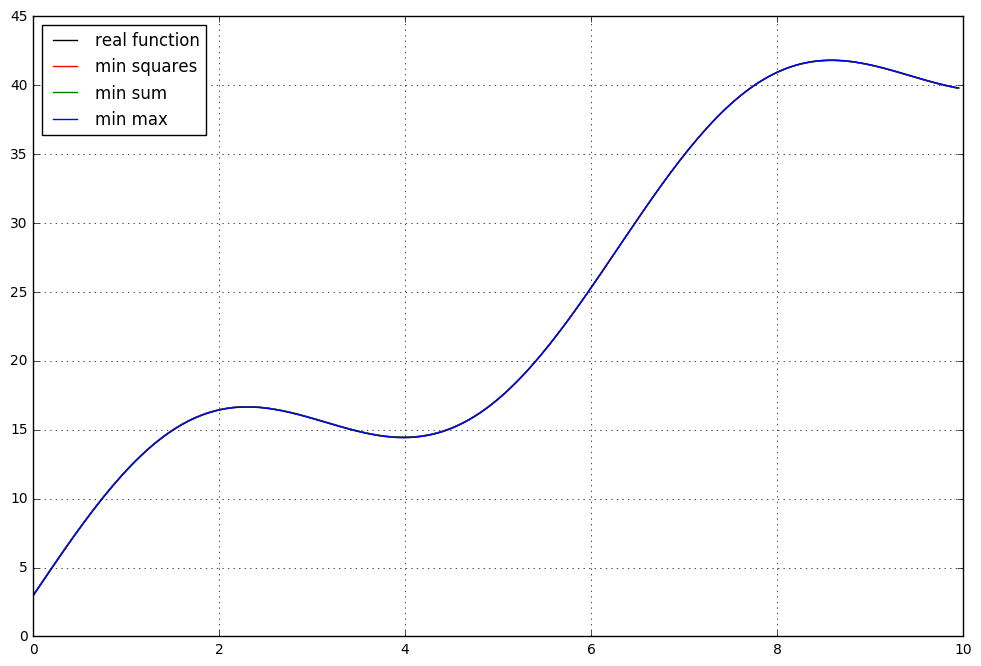

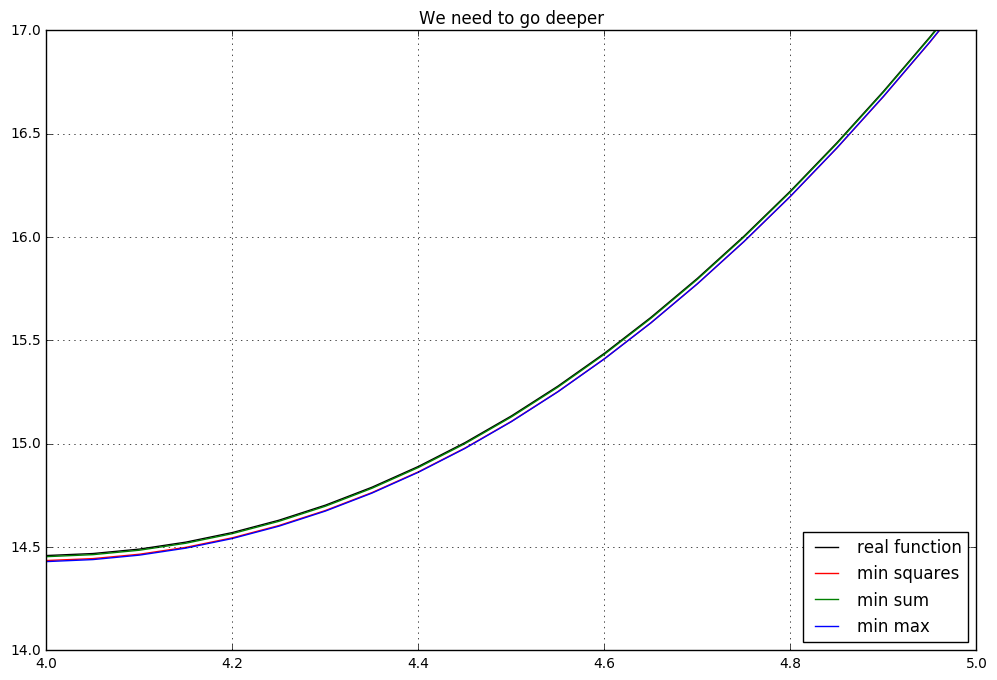

In [79]:
fig = plt.figure(figsize=(12, 8))
plt.plot(time, f, color='black', label='real function')
plt.plot(time, f_min_squares, color='red', label='min squares')
plt.plot(time, f_min_sum, color='green', label='min sum')
plt.plot(time, f_min_max, color='blue', label='min max')
plt.legend(loc=0)
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(12, 8))
plt.axis([4,5,14,17])
plt.plot(time, f, color='black', label='real function')
plt.plot(time, f_min_squares, color='red', label='min squares')
plt.plot(time, f_min_sum, color='green', label='min sum')
plt.plot(time, f_min_max, color='blue', label='min max')
plt.title('We need to go deeper')
plt.legend(loc=0)
plt.grid(True)
plt.show()

Давайте добавим выбросы

In [89]:
y_real[0] += 50
y_real[-1] -= 50

In [90]:
f_min_squares = func(min_squares(y_real))
f_min_sum = func(min_sum(y_real))
f_min_max = func(min_max(y_real))

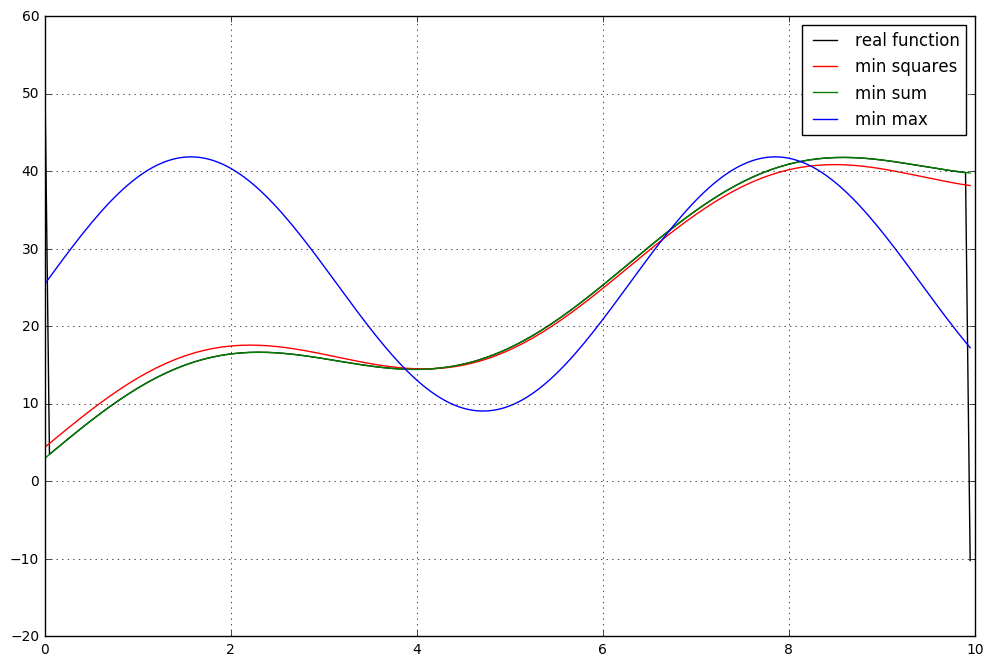

In [92]:
fig = plt.figure(figsize=(12, 8))
plt.plot(time, f, color='black', label='real function')
plt.plot(time, f_min_squares, color='red', label='min squares')
plt.plot(time, f_min_sum, color='green', label='min sum')
plt.plot(time, f_min_max, color='blue', label='min max')
plt.legend(loc=0)
plt.grid(True)
plt.show()

Увидели, что Метод наименьшего абсолютного значения наиболее чувстителен к выбросам, что логично, ведь мы ищем одно наибольшее отклонение и оцениваем точность нашей функции только по нему, никак не учитывая информацию о других точках.

Давайте теперь посмотрим, как себя будут вести коэффициенты при разных $\sigma$:

In [105]:
min_squares_acc = []
min_sum_acc = []
min_max_acc = []
sigmas = [0.1, 0.25, 0.5, 1.0, 1.5, 2.0, 3.0, 5.0]
for var in sigmas:
    y_obs = y_theory + sp.norm.rvs(scale=var, size=M)
    est_min_sq = min_squares(y_obs)
    est_min_sum = min_sum(y_obs)
    est_min_max = min_max(y_obs)
    min_squares_acc.append(np.linalg.norm(a - est_min_sq))
    min_sum_acc.append(np.linalg.norm(a - est_min_sum))
    min_max_acc.append(np.linalg.norm(a - est_min_max))

[]

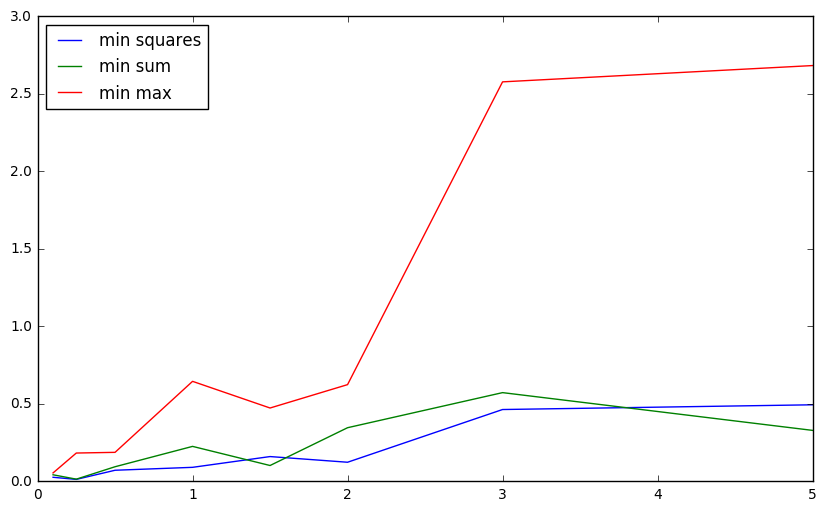

In [106]:
plt.figure(figsize=(10,6))
plt.plot(sigmas, min_squares_acc, label="min squares")
plt.plot(sigmas, min_sum_acc, label="min sum")
plt.plot(sigmas, min_max_acc, label="min max")
plt.legend(loc=0)
plt.plot()

Опять же получили, что min max наиболее всего чувствительный к выбросам склонен ошибаться сильнее всех при нахождении оптимальных коэффициентов.